# Set Up

In [1]:
import matplotlib.pyplot as plt
from ann_models import model_store
import pandas as pd
import math
import random

In [2]:
a = model_store()
models = a.get_models()

/Users/xander/Desktop/github/senior_thesis/ann_models.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['MID_PRICE'] = (taq_df['BID'] + taq_df['ASK']) / 2
/Users/xander/Desktop/github/senior_thesis/ann_models.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['TRADE_DIRECTION'] = taq_df.apply(lee_ready_algorithm, axis=1)
/Users/xander/Desktop/github/senior_thesis/ann_models.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

/var/folders/yc/n6lh7krx6p3b0zmdngvdb48c0000gn/T/ipykernel_10950/711675437.py:11: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axhline(y=0, color='black')


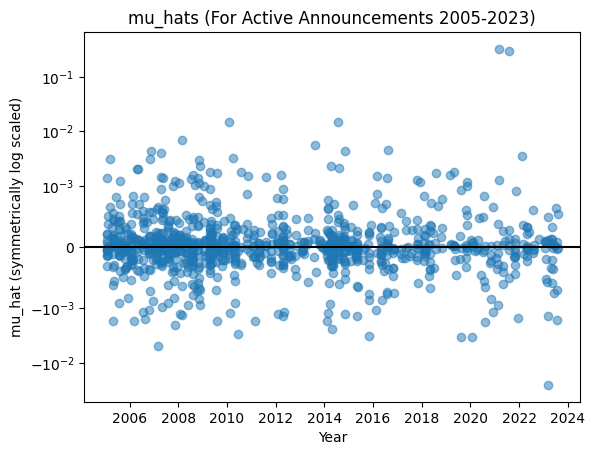

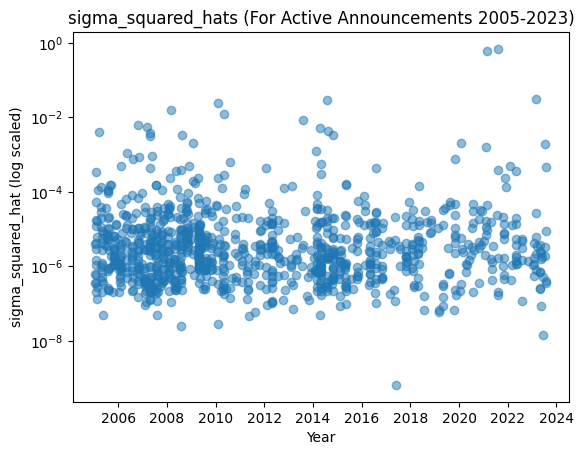

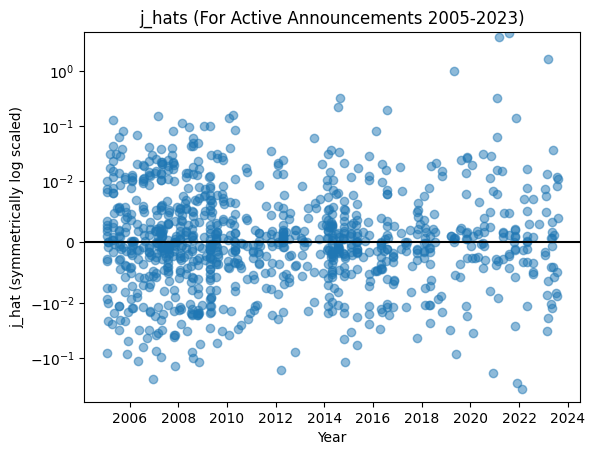

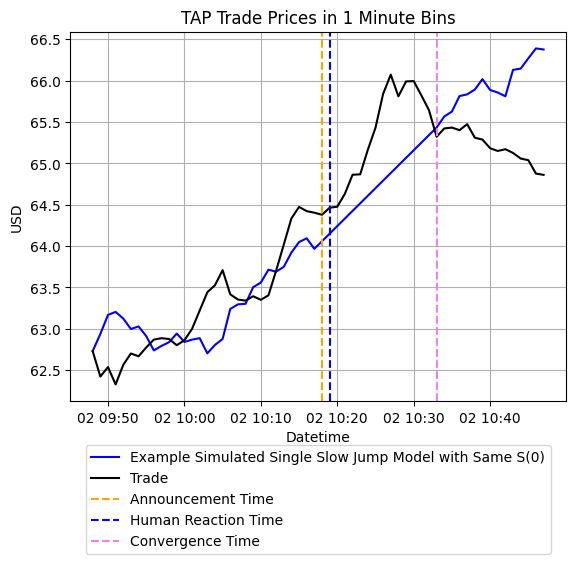

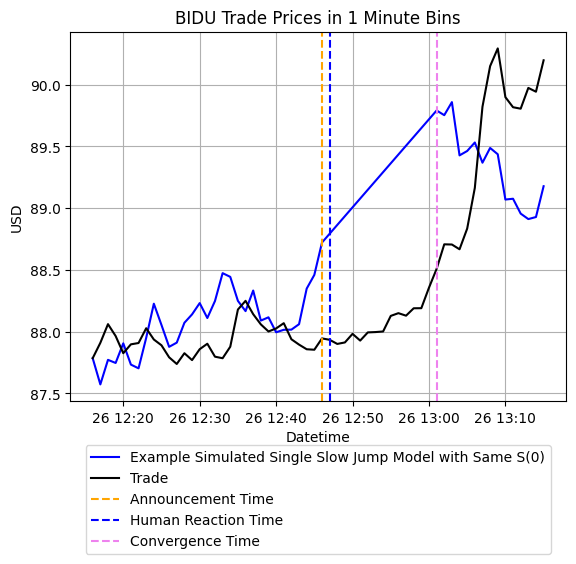

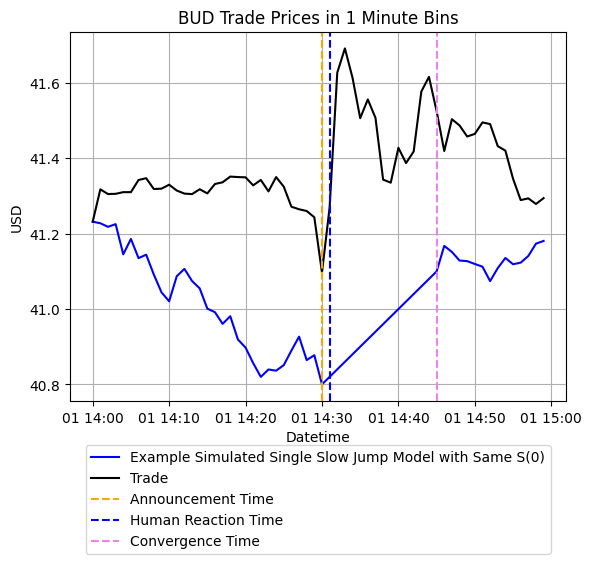

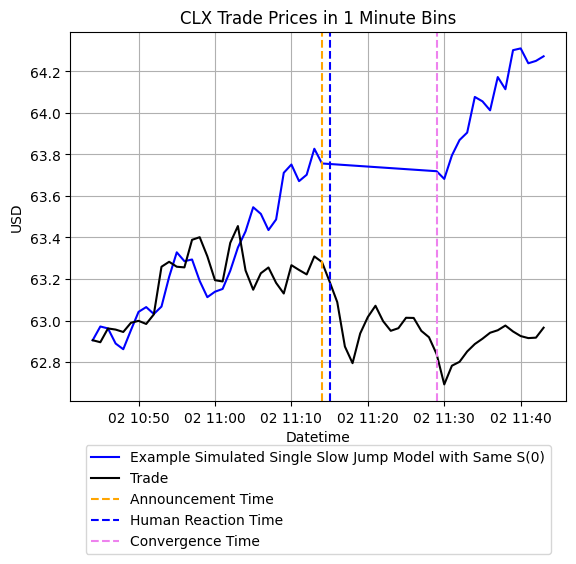

In [7]:
times = [model.time_n for model in models]
mu_hats = [model.mu_hat for model in models]
sigma_squared_hats = [model.sigma_squared_hat for model in models]
j_hats = [model.j_hat for model in models]

plt.title("mu_hats (For Active Announcements 2005-2023)")
plt.scatter(times, mu_hats, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("mu_hat (symmetrically log scaled)")
plt.yscale('symlog', linthresh=0.001) 
plt.axhline(y=0, color='black')
plt.show()

plt.title("sigma_squared_hats (For Active Announcements 2005-2023)")
plt.scatter(times, sigma_squared_hats, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("sigma_squared_hat (log scaled)")
plt.axhline(y=0, color='black')
plt.yscale('log') 
plt.show()

plt.title("j_hats (For Active Announcements 2005-2023)")
plt.scatter(times, j_hats, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("j_hat (symmetrically log scaled)")
plt.axhline(y=0, color='black')
plt.yscale('symlog', linthresh=0.01) 
plt.show()

random.seed(1)
models[0].plot_single_slow_jump_model_simulation()
models[100].plot_single_slow_jump_model_simulation()
models[105].plot_single_slow_jump_model_simulation()
models[110].plot_single_slow_jump_model_simulation()

# Identify HFT Trades

/Users/xander/Desktop/github/senior_thesis/ann_models.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hft_df['DOLLAR_VOLUME'] = hft_df["SIZE"] * hft_df["PRICE"]
/Users/xander/Desktop/github/senior_thesis/ann_models.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hft_df['DOLLAR_VOLUME'] = hft_df["SIZE"] * hft_df["PRICE"]
/Users/xander/Desktop/github/senior_thesis/ann_models.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

Pearson Correlation Coefficient, pval: (0.041387654851158945, 0.1885412744996915)
Spearman Correlation Coefficient, pval: (0.006779810833619897, 0.8295270463318938)


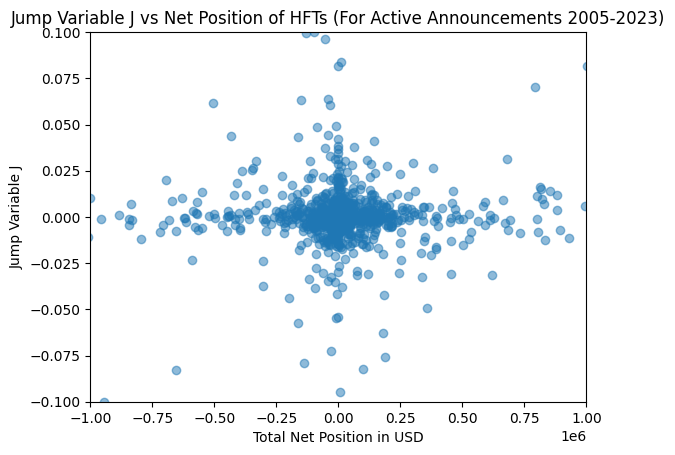

In [12]:
times = [model.time_n for model in models]
ftimes = [float((model.time_n - pd.Timestamp(0)).total_seconds()) for model in models]
mu_hats = [model.mu_hat for model in models]
sigma_squared_hats = [model.sigma_squared_hat for model in models]
j_hats = [model.j_hat for model in models]

hft_dollar_volumes = [model.get_hft_dollar_volume() for model in models]
hft_trade_volumes = [model.get_hft_trade_volume() for model in models]
hft_dollar_positions = [model.get_hft_dollar_position() for model in models]
profits = [model.get_hft_profit() for model in models]

plt.title("Jump Variable J vs Net Position of HFTs (For Active Announcements 2005-2023)")
plt.ylabel("Jump Variable J")
plt.xlabel("Total Net Position in USD")
plt.scatter(hft_dollar_positions, j_hats, alpha=0.5)
plt.xlim((-1.0*10**6,10**6))
plt.ylim((-0.1,0.1))

from scipy.stats import pearsonr, spearmanr
correlation_coefficient, p_value = pearsonr(hft_dollar_positions, j_hats)
print(f"Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(hft_dollar_positions, j_hats)
print(f"Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")

# Do HFTs’ fraction of market activity continue to change with volatility when during news announcements?

Pearson Correlation Coefficient, pval: (-0.004477803180518312, 0.8869205940469297)
Spearman Correlation Coefficient, pval: (0.0989677077842551, 0.0016291074218298034)


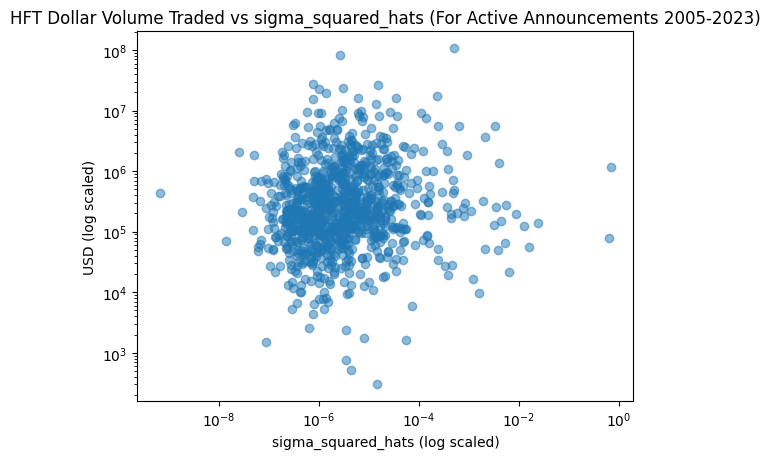

In [13]:
plt.scatter(sigma_squared_hats, hft_dollar_volumes, alpha=0.5)
plt.yscale("log")
plt.xscale("log")
plt.title("HFT Dollar Volume Traded vs sigma_squared_hats (For Active Announcements 2005-2023)")
plt.ylabel("USD (log scaled)")
plt.xlabel("sigma_squared_hats (log scaled)")

correlation_coefficient, p_value = pearsonr(sigma_squared_hats, hft_dollar_volumes)
print(f"Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(sigma_squared_hats, hft_dollar_volumes)
print(f"Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")

# Has the profitability of HFT during news announcements changed over time? Specifically, what is the estimated percent change in profits?

/Users/xander/Desktop/github/senior_thesis/ann_models.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hft_df['DOLLAR_VOLUME'] = hft_df["SIZE"] * hft_df["PRICE"]
/Users/xander/Desktop/github/senior_thesis/ann_models.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hft_df['DOLLAR_VOLUME'] = hft_df["SIZE"] * hft_df["PRICE"]
/Users/xander/Desktop/github/senior_thesis/ann_models.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

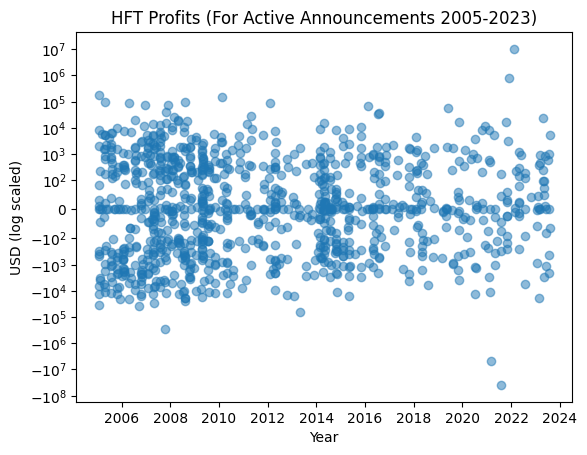

Profit Pearson Correlation Coefficient, pval: (-0.045505019876299076, 0.1482201340610242)
Profit Spearman Correlation Coefficient, pval: (0.03473725737343455, 0.2698186307981995)
-32167015.817071978


In [17]:
profits = [models[i].get_hft_dollar_position()* (math.exp(15 * (models[i].mu_hat - models[i].sigma_squared_hat/2) + models[i].j_hat)-1) for i in range(len(models))]

plt.scatter(times, profits, alpha=0.5)
plt.yscale('symlog', linthresh=100) 
plt.title("HFT Profits (For Active Announcements 2005-2023)")
plt.ylabel("USD (log scaled)")
plt.xlabel("Year")
plt.show()

correlation_coefficient, p_value = pearsonr(ftimes, profits)
print(f"Profit Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(ftimes, profits)
print(f"Profit Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")

print(sum(profits))


# Have HFT trades at times of news announcements improved in their ability to shift prices toward the true underlying value of the stock? Specifically, what is the estimated change in price due to HFT and how has it changed over time?


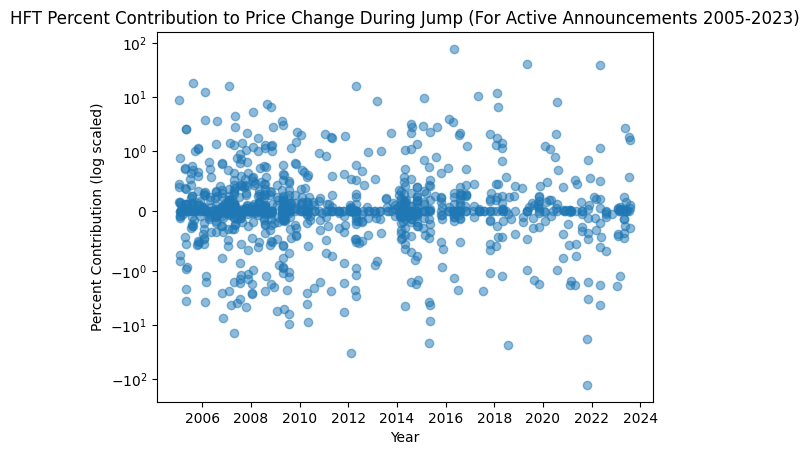

Contribution Pearson Correlation Coefficient, pval: (-0.02279983684882858, 0.4689760674235612)
Contribution Spearman Correlation Coefficient, pval: (-0.05095795513977661, 0.1053787875209895)
0.020953760577288576


In [18]:
# contribution provided / percent jump = price change caused by HFT / price change according to jump
contributions = [model.get_hft_contribution() for model in models]

plt.scatter(times, contributions, alpha=0.5)
plt.yscale('symlog', linthresh=1) 
plt.title("HFT Percent Contribution to Price Change During Jump (For Active Announcements 2005-2023)")
plt.ylabel("Percent Contribution (log scaled)")
plt.xlabel("Year")
plt.show()

correlation_coefficient, p_value = pearsonr(ftimes, contributions)
print(f"Contribution Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(ftimes, contributions)
print(f"Contribution Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")
print(sum(contributions)/len(contributions))
